In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten

In [56]:
# Loading dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalizing dataset
train_X = train_X/255
test_X = test_X/255
train_X.shape

(60000, 28, 28)

In [13]:
# One hot encoding Y 
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

train_Y = one_hot(train_y).T
test_Y = one_hot(test_y).T

In [98]:
# Creating model
model = keras.Sequential()
model.add(Conv2D(1, (3, 3), activation='linear', padding='same', strides=1, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# model.add(Conv2D(2, 2, activation='linear', padding='same', strides=1))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 1)         10        
                                                                 
 activation_22 (Activation)  (None, 28, 28, 1)         0         
                                                                 
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,860
Trainable params: 7,860
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Training model
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_Y)).batch(64)
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 0.5048 - accuracy: 0.8622 - val_loss: 0.3106 - val_accuracy: 0.9110
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.3031 - accuracy: 0.9139 - val_loss: 0.2887 - val_accuracy: 0.9176
Epoch 3/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2865 - accuracy: 0.9197 - val_loss: 0.2810 - val_accuracy: 0.9208
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2780 - accuracy: 0.9220 - val_loss: 0.2765 - val_accuracy: 0.9219
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2721 - accuracy: 0.9238 - val_loss: 0.2733 - val_accuracy: 0.9229
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2675 - accuracy: 0.9249 - val_loss: 0.2709 - val_accuracy: 0.9231
Epoch 7/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2637 - accuracy: 0.9263 - val_loss: 0.2689 - val_accuracy: 0

In [101]:
history.history

{'loss': [0.5048062801361084,
  0.30312296748161316,
  0.28649789094924927,
  0.27799445390701294,
  0.27213773131370544,
  0.26754045486450195,
  0.26370957493782043,
  0.26035335659980774,
  0.25732913613319397,
  0.254560649394989],
 'accuracy': [0.8621500134468079,
  0.9139000177383423,
  0.9196666479110718,
  0.921999990940094,
  0.9238499999046326,
  0.9248999953269958,
  0.9262833595275879,
  0.9275166392326355,
  0.928516685962677,
  0.9292500019073486],
 'val_loss': [0.3105638027191162,
  0.2887009382247925,
  0.2810029089450836,
  0.2764620780944824,
  0.27331066131591797,
  0.2708668112754822,
  0.268897145986557,
  0.26722145080566406,
  0.2657996118068695,
  0.2645088732242584],
 'val_accuracy': [0.9110000133514404,
  0.9175999760627747,
  0.920799970626831,
  0.9218999743461609,
  0.9229000210762024,
  0.9230999946594238,
  0.9236000180244446,
  0.9240000247955322,
  0.9246000051498413,
  0.9244999885559082]}

C:\Users\rasul\AppData\Local\Temp\ipykernel_9000\973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\rasul\AppData\Local\Temp\ipykernel_9000\973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

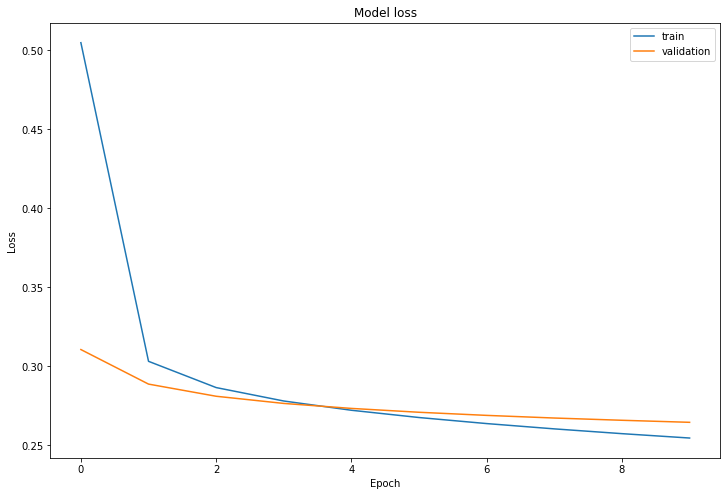

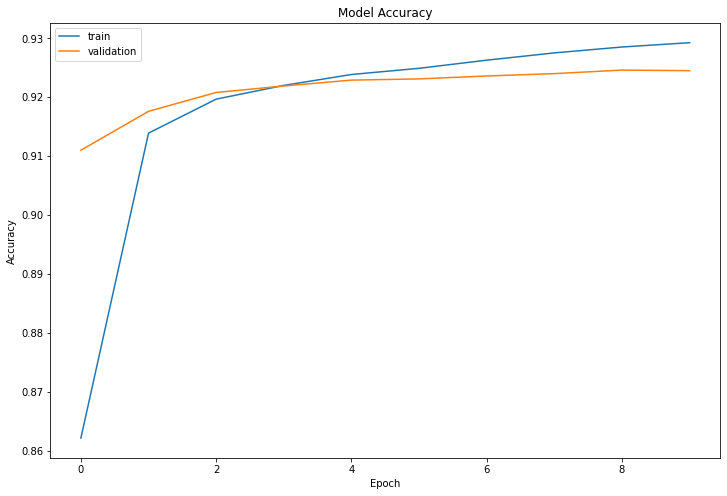

In [102]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [103]:
predict = model.predict(test_X)

313/313 [==============================] - 1s 3ms/step


In [118]:
def give_num(lst):
#     max_value = max(lst)
#     max_index = lst.index(max_value)
    return np.argmax(lst)
i = 31
print("Actual value: ", give_num(test_Y[i]), "\nPredicted value: ", give_num(predict[i]))

Actual value:  1 
Predicted value:  1
